#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

*  Norma de los Ángeles García López A01228278
*  Ramón Ariel Iván Muñoz Corona A01330566
*  Denisse María Ramírez Colmenero A01561497
*  Ignacio Valdés Reyes  A01793262
*  Rigoberto Vega Escudero. A01793132


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

Installl Grapshviz

In [ ]:
# !apt install libgraphviz-dev
# !pip install pygraphviz

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from google.colab import drive
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import power_transform


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, make_scorer
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from sklearn.model_selection import  cross_validate
from sklearn.model_selection import learning_curve, validation_curve

from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from collections import Counter
from imblearn.combine import SMOTETomek
from sklearn import tree
import pydotplus 
from IPython.display import Image

#**Ejercicio-1.** 

1.  Carga los datos y sustituye los nombres de las columnas del alemán al inglés de acuerdo a como se indica en la página de la UCI.  

In [ ]:
drive.mount('/content/drive')
#mypath = "/content/SouthGermanCredit.asc"
mypath = '/content/drive/MyDrive/Colab Notebooks/Inteligencia Artificial/Actividad 7/SouthGermanCredit.asc'
data = pd.read_csv(mypath, sep=" ")
data.columns = ['status','duration','credit_history','purpose','amount','savings','employment_duration',
                'installment_rate','personal_status_sex','other_debtors','present_residence','property','age','other_installment_plans',
                'housing','number_credits','job','people_liable','telephone','foreign_worker','credit_risk']
print(data.shape)
data.head()

Mounted at /content/drive
(1000, 21)


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [ ]:
#checamos la limpieza general de los datos, donde notaremos que no hay datos faltantes en los datasets
data.isna().any()

status                     False
duration                   False
credit_history             False
purpose                    False
amount                     False
savings                    False
employment_duration        False
installment_rate           False
personal_status_sex        False
other_debtors              False
present_residence          False
property                   False
age                        False
other_installment_plans    False
housing                    False
number_credits             False
job                        False
people_liable              False
telephone                  False
foreign_worker             False
credit_risk                False
dtype: bool

#**Ejercicio-2.**

2. Realiza una partición de los datos en el conjunto de entrenamiento del 85% y el de prueba de 15%.Los modelos se estarán entrenando con el método de validación cruzada, así que no es necesario en este paso generar el conjunto de validación. Define como la variable X a todas las variables de entrada y a la variable Y como la variable de salida. 

In [ ]:
#Generamos la particion de los datos, primeramente separando la informacion de cada uno.
X , y =   data.drop('credit_risk', axis='columns'), data['credit_risk']  
X_train_Or, X_val, y_train_Or, y_val = train_test_split(X, y, train_size=0.85, random_state=1)

#Haremos un chequeo del balanceo de los datos. Es necesario balancearlos?

In [ ]:
print('Total de datos generados:', y_train_Or.shape[0])
print('Total de datos en la clase positiva', y_train_Or.sum())
print('Total de datos en la clase negativa', (y_train_Or.shape[0] - y_train_Or.sum()))

Total de datos generados: 850
Total de datos en la clase positiva 592
Total de datos en la clase negativa 258


In [ ]:
def get_models_underoversampling():
  modelos, nombres = list(), list()

  # técnica y nombre: RandOver
  modelos.append(RandomOverSampler())
  nombres.append('RandOver')

  # técnica y nombre: TomekLinks
  modelos.append(TomekLinks())
  nombres.append('TomekLinks')

  # técnica y nombre: SMOTE
  modelos.append(SMOTE())
  nombres.append('SMOTE')

  # técnica y nombre: SMOTEENN
  modelos.append(SMOTEENN())
  nombres.append('SMOTEENN')


  return modelos, nombres

Balanceo SMOTE

In [ ]:
# os =  SMOTE()
# X_train_res, y_train_res = os.fit_resample(X_train, y_train)
 
# print ("Distribution before resampling {}".format(Counter(y_train)))
# print ("Distribution after resampling {}".format(Counter(y_train_res)))

Balanceo TomekLinks

In [ ]:
# os =  TomekLinks()
# X_train_res, y_train_res = os.fit_resample(X_train, y_train)
 
# print ("Distribution before resampling {}".format(Counter(y_train)))
# print ("Distribution after resampling {}".format(Counter(y_train_res)))

**Balanceo SMOTETomek**

In [ ]:
os =  SMOTETomek()
X_train, y_train = os.fit_resample(X_train_Or, y_train_Or)
 
print ("Distribution before resampling {}".format(Counter(y_train_Or)))
print ("Distribution after resampling {}".format(Counter(y_train)))

Distribution before resampling Counter({1: 592, 0: 258})
Distribution after resampling Counter({1: 507, 0: 507})


Balanceo RandomOverSample

In [ ]:
# os =  RandomOverSampler()
# X_train_res, y_train_res = os.fit_resample(X_train, y_train)
 
# print ("Distribution before resampling {}".format(Counter(y_train)))
# print ("Distribution after resampling {}".format(Counter(y_train_res)))
 


#**Ejercicio-3.**

Como una primera aproximación (baseline) realizarás las siguientes transformaciones mínimas
para generar los primeros modelos. En la misma página de la UCI se indica el tipo de variable de
cada uno de los factores. Definen cuatro tipo de variables: categórica (categorical), ordinal
(discretized quantitative), numérica (quantitative) y binaria (binary). 

In [ ]:
#Definicion de variables
# categorical
categorica = ['status', 'credit_history', 'purpose', 'savings','personal_status_sex','other_debtors',
              'other_installment_plans','housing']
# discretized quantitative
ordinal = ['employment_duration','installment_rate','present_residence','property','number_credits','job']
#quantitative
numerica = ['duration','amount','age']
# Binaria
binaria = ['people_liable','telephone','foreign_worker']

print(len(categorica),len(ordinal),len(numerica),len(binaria))

8 6 3 3


Veremos la distribucion de los datos en las variables categoricas

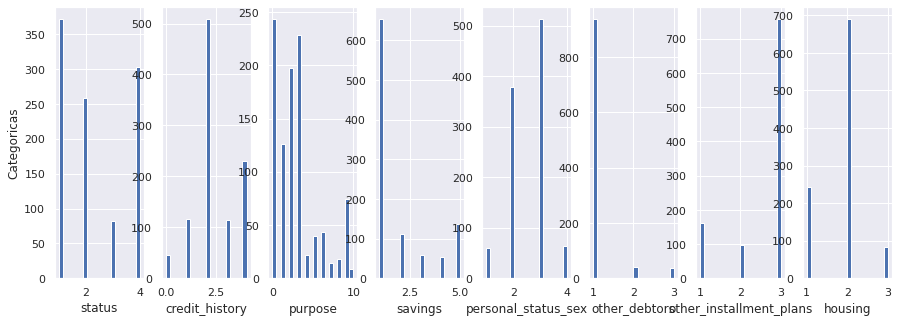

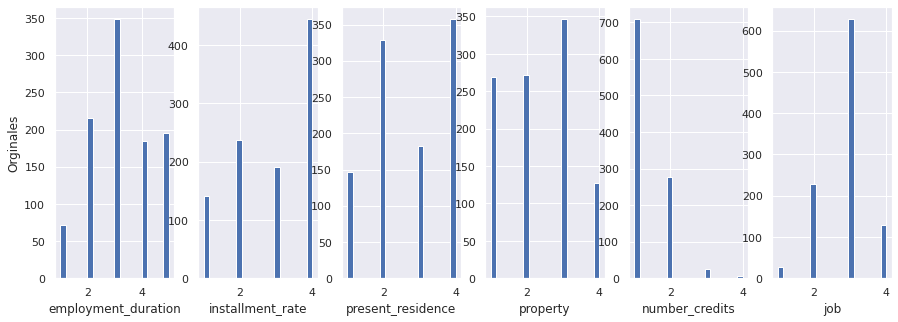

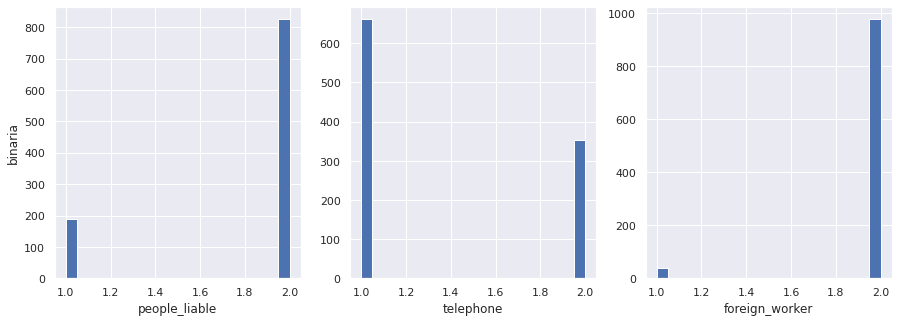

In [ ]:
#Categorica
sns.set(rc={'figure.figsize':(15,5)})
fig, axes = plt.subplots(1, 8)   
for k in range(0,8):  
  plt.subplot(1,8,k+1) 

  Transf0 = X_train[categorica].iloc[:,k].to_numpy().reshape(-1, 1)  #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
  plt.hist(Transf0, bins=20) 
  plt.xlabel(categorica[k])
  if k==0:
    plt.ylabel('Categoricas')

#Ordinales
k=0
fig, axes = plt.subplots(1, 6)   
for k in range(0,6):  
  plt.subplot(1,6,k+1) 

  Transf0 = X_train[ordinal].iloc[:,k].to_numpy().reshape(-1, 1)  #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
  plt.hist(Transf0, bins=20) 
  plt.xlabel(ordinal[k])
  if k==0:
    plt.ylabel('Orginales')

#numerica


#Binaria
k=0
fig, axes = plt.subplots(1, 3)   
for k in range(0,3):  
  plt.subplot(1,3,k+1) 

  Transf0 = X_train[binaria].iloc[:,k].to_numpy().reshape(-1, 1)  #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
  plt.hist(Transf0, bins=20) 
  plt.xlabel(binaria[k])
  if k==0:
    plt.ylabel('binaria')

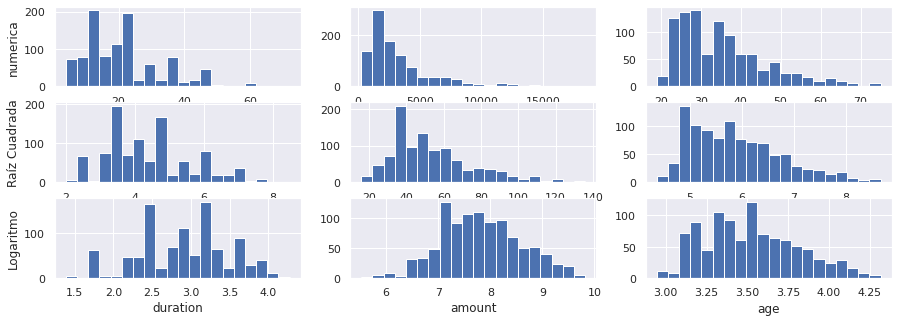

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
#Numerica
k=0
fig, axes = plt.subplots(3, 3)   
for k in range(0,3):  
  plt.subplot(3,3,k+1) 

  Transf0 = X_train[numerica].iloc[:,k].to_numpy().reshape(-1, 1)  #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
  plt.hist(Transf0, bins=20) 
  plt.xlabel(numerica[k])
  if k==0:
    plt.ylabel('numerica')
  
  plt.subplot(3,3,k+4)    
  Transf1 = np.sqrt(Transf0)       #  En esta línea se debe aplicar la raíz cuadrada a los valores de cada variable "k" sin transformar.
  plt.hist(Transf1, bins=20)                      #  En este línea agrega el comando para obtener el histograma de Transf1 con 20 barras (bins).
  plt.xlabel(numerica[k])
  if k==0:
    plt.ylabel('Raíz Cuadrada')

  plt.subplot(3,3,k+7)    
  Transf2 = np.log(Transf0)       #  En esta línea se debe aplicar la raíz cuadrada a los valores de cada variable "k" sin transformar.
  plt.hist(Transf2, bins=20)                      #  En este línea agrega el comando para obtener el histograma de Transf1 con 20 barras (bins).
  plt.xlabel(numerica[k])
  if k==0:
    plt.ylabel('Logaritmo')

##En lo anterior haremos un estudio de los datos numéricos, donde podemos notar que la transformación de logaritmos es la que más normaliza nuestros datos, por ende, será la elegida para continuar.

Con base a dicha información realiza un Pipeline que incluya al menos las siguientes transformaciones:

1. Imputación a todas las variables de entrada, diferenciando entre el tipo de cada variable
(decide y justifica que tipo de imputación realizas en cada caso).
2. Realiza un análisis de las variables numéricas (quantitative) de entrada y aplica una
transformación que escale a todas ellas en un rango equiparable.
3. Aplica la transformación One-Hot encoding a las variables de entrada de tipo categórico y binaria. En particular, justifica por qué una variable binaria requeriría que se le aplique la transformación one-hot encoding. Por el momento dejar las variables ordinales sin transformar. 


In [ ]:
#Pipelines                                                     
num_prepro_pipeline = Pipeline(steps = [('impMean', SimpleImputer(strategy='median')),  
                                        ('scalar', MinMaxScaler(feature_range=(1,2))),
                                         ('sqrt', FunctionTransformer(np.log)) ])  
num_pipeline_nombres = numerica

Cat_prepro_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),
                                        ('OneHotE', OneHotEncoder(drop='first'))])
#CatOHE_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder(drop='first'))])   
Cat_pipeline_nombres = categorica

Bin_prepro_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),
                                        ('OneHotE', OneHotEncoder(drop='first'))]) 
Bin_pipeline_nombres = binaria

columnasTransformer = ColumnTransformer(transformers = [('numerical', num_prepro_pipeline, num_pipeline_nombres),
                                        ('categoricaimp', Cat_prepro_pipeline, Cat_pipeline_nombres),
                                        ('binariaimp', Bin_prepro_pipeline, Bin_pipeline_nombres),
                                        ])

# columnasTransformer = ColumnTransformer(transformers = [('numerical', num_prepro_pipeline, num_pipeline_nombres),
#                                         ('categoricaimp', Cat_prepro_pipeline, Cat_pipeline_nombres),
#                                         ('binariaimp', Bin_prepro_pipeline, Bin_pipeline_nombres),
#                                         ],remainder='passthrough')


##Justificación transformación a variables Binarias
A la variable binaria tambien nos ayuda a hacer el OneHotEncoding, ya que nos ayuda con la distribucion de los datos incluso aunque sean valores 1 y 0, es mejor tenerlos separados para tener mejor distribucion del conjunto de los datos en relacion a la salida de Y. ya que si podemos notar en las graficas tenemos valores de 1 y 2 en total. Por ende al distribuirlas en dos columnas tendremos valores de 0 y 1 y de 0 y 2. 

Tambien esto nos ayuda a que el peso de las variables binarias se les da un peso numerico y al correr los modelos entre mas grande sea este peso, mas peso es asociado a mayor magnitud y menor a las de menor peso. Esto ayudando con los sesgos que pudiera tener los modelos mas adelante.

#**Ejercicio-4.**

## 4.   Llevarás un entrenamiento usando validación cruzada entre los siguientes tres modelos de aprendizaje automático: Regresión Logística, Árbol de Decisión y Bosque Aleatorio. Deberás llevar a cabo el entrenamiento de los tres de manera conjunta usando un ciclo FOR. Recuerda aplicar las transformaciones que definiste en tu Pipeline. El entrenamiento debe ser con las siguientes características: 







##Generación de Modelos de aprendizaje

1.  Usa los parámetros predeterminados de cada modelo. 

In [ ]:
def get_models():
  modelos = list()
  nombres = list()

  # LR - Regresión Logística:
  modelos.append(LogisticRegression(solver='liblinear'))
  nombres.append('LR')

  # DT - Árbol de Decisión:
  modelos.append(DecisionTreeClassifier())
  nombres.append('DT')
  
  # RFC - Random Forest / Bosque Aleatorio:  
  modelos.append(RandomForestClassifier())
  nombres.append('RFC')
  
  
  return modelos, nombres

## Generación de Funciones de métricas

2.  En cada iteración deben calcularse todas las siguientes métricas: accuracy, precision, recall, f1-score y Gmean. Todas estas métricas deben ser funciones que tú mismo debes definir (Es decir, no usar las funciones de dichas métricas que te proporciona scikit-learn. Sin embargo, sí puedes usar la información regresada por el método confusion_matrix() de scikit-learn para definir las métricas). 


In [ ]:
#Funcion Accuracy
def mi_accuracy(yreal, ypred):
  cm = confusion_matrix(yreal, ypred)
  vn, fp, fn, vp = cm[0,0], cm[0,1], cm[1,0], cm[1,1] 
  
  return (vp+vn)/(vp+vn+fp+fn)

In [ ]:
#Funcion Precision
def mi_precision(yreal, ypred):
  cm = confusion_matrix(yreal, ypred)
  vn, fp, fn, vp = cm[0,0], cm[0,1], cm[1,0], cm[1,1] 
  
  return (vp)/(vp+fp)

In [ ]:
#Funcion recall
def mi_recall(yreal, ypred):

  cm = confusion_matrix(yreal, ypred)
  vn, fp, fn, vp = cm[0,0], cm[0,1], cm[1,0], cm[1,1] 
  
  return (vp)/(vp+fn)

In [ ]:
#Funcin G-Mean
def mi_gmean(yreal, ypred):

    cm = confusion_matrix(yreal, ypred)
    vn, fp, fn, vp = cm[0,0], cm[0,1], cm[1,0], cm[1,1] 
    recall = vp / (vp+fn)
    especificidad = vn / (vn+fp)
    gmean = np.sqrt(recall * especificidad)

    return gmean

In [ ]:
#Funcion f1-score
def mi_f1score(yreal, ypred):

    cm = confusion_matrix(yreal, ypred)
    vn, fp, fn, vp = cm[0,0], cm[0,1], cm[1,0], cm[1,1] 
    
    return (2*vp)/((2*vp)+fp+fn)

##Ejecución de los modelos para obtener resultados y boxpots de los datos de entrenamiento.

3.  Usar validación cruzada estratificada con 5 particiones y con 3 repeticiones. 

4.  Imprimir el valor de todas estas métricas, tanto para los datos de entrenamiento, como para los de validación. Así como los diagramas de caja y bigotes de los tres modelos con la métrica “recall”. ¿Alguno de los modelos está subentrenado o sobreentrenado? Justifica tu respuesta. 

In [ ]:
modelos, nombres = get_models()  # cargamos los modelos a comparar
resultados = list()   

for i in range(len(modelos)):
  
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])
  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
  mismetricas = {'accuracy':make_scorer(mi_accuracy), 'precision':make_scorer(mi_precision),
                 'recall':make_scorer(mi_recall), 'gmean':make_scorer(mi_gmean), 
                 'f1':make_scorer(mi_f1score)}
  scores = cross_validate(pipeline, X_train, np.ravel(y_train), scoring=mismetricas, cv=cv, return_train_score=True)


  resultados.append(scores)
  print('>> %s: \nmean Train Accuracy: %.3f (%.4f)\nmean Test Accuracy: %.3f (%.4f)\n\nmean Train Precision: %.3f (%.4f)\nmean Test Precision: %.3f (%.4f)\n\nmean Train Recall: %.3f (%.4f)\nmean Test Recall: %.3f (%.4f)\n\nTrain Gmean: %.3f (%.4f)\nTest Gmean: %.3f (%.4f)\n\nmean Train f1-score: %.3f (%.4f)\nmean Test f1-score: %.3f (%.4f)\n' % (
                                                                                                 nombres[i],
                                                                                                 np.mean(resultados[i]['train_accuracy']),
                                                                                                 np.std(resultados[i]['train_accuracy']),
                                                                                                 np.mean(resultados[i]['test_accuracy']),
                                                                                                 np.std(resultados[i]['test_accuracy']),
                                                                                                 np.mean(resultados[i]['train_precision']),
                                                                                                 np.std(resultados[i]['train_precision']),  
                                                                                                 np.mean(resultados[i]['test_precision']),
                                                                                                 np.std(resultados[i]['test_precision']),  
                                                                                                 np.mean(resultados[i]['train_recall']),
                                                                                                 np.std(resultados[i]['train_recall']),
                                                                                                 np.mean(resultados[i]['test_recall']),
                                                                                                 np.std(resultados[i]['test_recall']),
                                                                                                 np.mean(resultados[i]['train_gmean']),
                                                                                                 np.std(resultados[i]['train_gmean']),
                                                                                                 np.mean(resultados[i]['test_gmean']),
                                                                                                 np.std(resultados[i]['test_gmean']),
                                                                                                 np.mean(resultados[i]['train_f1']),
                                                                                                 np.std(resultados[i]['train_f1']), 
                                                                                                 np.mean(resultados[i]['test_f1']),
                                                                                                 np.std(resultados[i]['test_f1']), 
                                                                                                  ))


>> LR: 
mean Train Accuracy: 0.822 (0.0080)
mean Test Accuracy: 0.805 (0.0281)

mean Train Precision: 0.829 (0.0075)
mean Test Precision: 0.815 (0.0340)

mean Train Recall: 0.809 (0.0113)
mean Test Recall: 0.792 (0.0429)

Train Gmean: 0.821 (0.0080)
Test Gmean: 0.804 (0.0282)

mean Train f1-score: 0.819 (0.0085)
mean Test f1-score: 0.802 (0.0300)

>> DT: 
mean Train Accuracy: 1.000 (0.0000)
mean Test Accuracy: 0.745 (0.0472)

mean Train Precision: 1.000 (0.0000)
mean Test Precision: 0.745 (0.0483)

mean Train Recall: 1.000 (0.0000)
mean Test Recall: 0.746 (0.0702)

Train Gmean: 1.000 (0.0000)
Test Gmean: 0.743 (0.0479)

mean Train f1-score: 1.000 (0.0000)
mean Test f1-score: 0.744 (0.0529)

>> RFC: 
mean Train Accuracy: 1.000 (0.0000)
mean Test Accuracy: 0.810 (0.0236)

mean Train Precision: 1.000 (0.0000)
mean Test Precision: 0.823 (0.0258)

mean Train Recall: 1.000 (0.0000)
mean Test Recall: 0.789 (0.0350)

Train Gmean: 1.000 (0.0000)
Test Gmean: 0.809 (0.0239)

mean Train f1-score: 

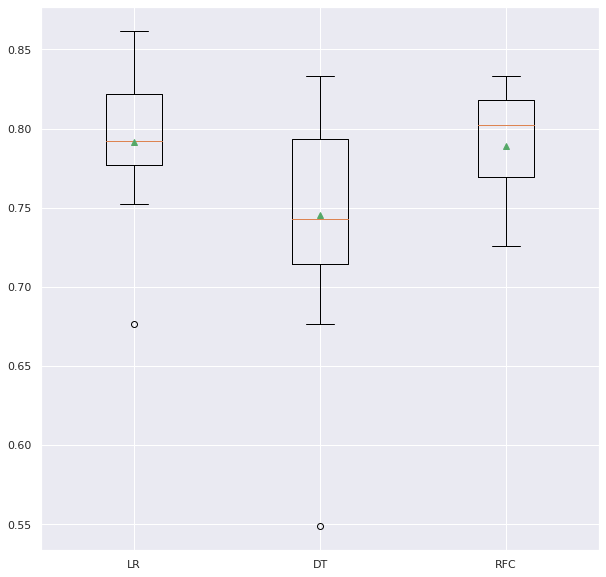

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})

#########################################################################
#########################################################################
# INICIA LA SECCIÓN PARA AGREGAR CÓDIGO.
# Ejercicio 6
# Incluir el diagrama de caja de cada modelo de los resultados obtenidos 
# con la métrica Recall.
# Sustituye None por las líneas de código.
# Se esperan unas 5 líneas de código aproximadamente.

bpRecall = list()
for i in range(len(resultados)):
  rr = resultados[i]['test_recall']
  bpRecall.append(rr)

plt.boxplot(bpRecall, labels=nombres, showmeans=True)
plt.show()

# TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
#########################################################################

plt.show()

# ¿Alguno de los modelos está subentrenado o sobreentrenado? 

Basándonos solo en los datos obtenidos de los bloxpot y métricas de desempeño, creo el único que podríamos deducir como subentrenado es el DecisionTree, ya que al compararlo con los otros dos modelos vemos un desempeño un poco mas bajo.

Donde también en sus métricas de Accuracy y Precisión salen con un rendimiento inferior, además que también tenemos las métricas de G-mean que muestra una pobre relación entre la sensibilidad y la precisión, además que el F1-score nos dice que no esta teniendo tan en cuenta nuestra principal característica a predecir.

##Curvas de entrenamiento

Código para definir la gráfica de las curvas

In [ ]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores, score_type):

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='darkblue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='darkblue')
    
    plt.plot(train_sizes, val_mean, color='darkgreen', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='darkgreen')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.grid()
    plt.ylabel(score_type)
    plt.legend(loc='lower left')
    plt.show()

In [ ]:
def mi_ValidationCurvePlot(param_range, t_scores, v_scores, score_type):

    train_mean = np.mean(t_scores, axis=1)
    train_std = np.std(t_scores, axis=1)
    val_mean = np.mean(v_scores, axis=1)
    val_std = np.std(v_scores, axis=1)

    
    plt.figure(figsize=(7,6))
    plt.plot(param_range, train_mean, color='darkblue', marker='o', markersize=5, label='Training')
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.1, color='darkblue')
    
    plt.plot(param_range, val_mean, color='darkgreen', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(param_range, val_mean + val_std, val_mean - val_std, alpha=0.1, color='darkgreen')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.grid()
    plt.ylabel(score_type)
    plt.legend(loc='lower left')
    plt.show()

###Funciones para cada tipo de curva de acuerdo a lo especificado en la entrega

e.  En particular obtengamos algunas de las llamadas curvas de aprendizaje para algunos de estos casos. En dada gráfico debes incluir tus comentarios sobre el modelo generado: 


1.  Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando el tamaño de la muestra para el modelo de regresión Logística con su hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de los conjuntos de entrenamiento y la métrica “f1-score”, como evaluación del 
desempeño de dicha función “learning_curve()”.  



###Curva del modelo de Regresón Logística

In [ ]:
#Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando el tamaño de la muestra para el modelo de regresión Logística con su hiperparámetros predeterminados. 
#Utilizar al menos 20 puntos en la partición de los conjuntos de entrenamiento y la métrica “f1-score”, como evaluación del desempeño de dicha función “learning_curve()”. 
modelos, nombres = get_models()  # cargamos los modelos a comparar
resultados = list() 
def mi_ModeloYCurvasLR(Xin):
     
       modelo = modelos[0]

       Xct = columnasTransformer.fit(Xin)
       Xxt = Xct.transform(Xin)

      
       mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=0)

          
       delta_train_sz = np.linspace(0.1, 1.0, num=20)

       tr_sizes, tr_scores, val_scores = learning_curve(estimator = modelo,    
                                                        X = Xxt,
                                                        y = y_train,
                                                        cv = mi_kfold,
                                                        train_sizes = delta_train_sz,
                                                        scoring = make_scorer(mi_f1score) ,
                                                        random_state=0)
       
       
       mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores,'f-score')

Curvas de aprendizaje del modelo LR:


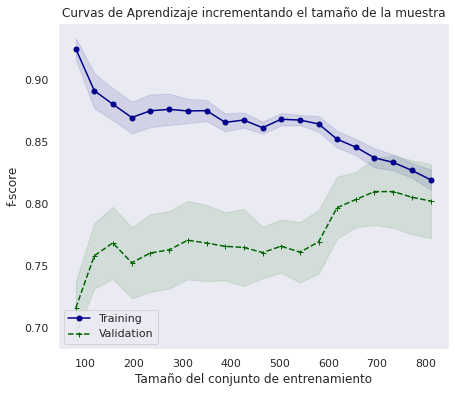

In [ ]:
print('Curvas de aprendizaje del modelo LR:')
mi_ModeloYCurvasLR(X_train)


Después de ver las curvas de modelo, podemos notar que estamos tendiendo tendencia de subentrenamiento debido a que vemos una disminución en la precisión del modelo, además de tener una reducción en la varianza en cada iteración.

###Curvas del modelo de Árbol de Decisión

2.  Obtener las curvas de validación (validation_curve) en la cual se va incrementando la complejidad del hiperparámetro “max_depth” para el modelo de árbol de decisión con sus hiperparámetros predeterminados. Utilizar valores de máxima profundidad desde 1 hasta 20 y con la métrica “f1-score” para la evaluación del desempeño del modelo. 

In [ ]:
#Obtener las curvas de validación (validation_curve) en la cual se va incrementando la complejidad del hiperparámetro “max_depth” para el modelo de árbol de decisión con sus hiperparámetros predeterminados. 
#Utilizar valores de máxima profundidad desde 1 hasta 20 y con la métrica “f1-score” para la evaluación del desempeño del modelo. 
modelos, nombres = get_models()  # cargamos los modelos a comparar
resultados = list() 
def mi_ModeloYCurvasDT(Xin):
     modelo = DecisionTreeClassifier()

     Xct = columnasTransformer.fit(Xin)
     Xxt = Xct.transform(Xin)


     mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=0)

         
     param_range = np.linspace(1,20,20, dtype='int')
     t_scores, v_scores = validation_curve(estimator = modelo,    
                                                        X = Xxt,
                                                        y = y_train,
                                                        param_name = "max_depth",
                                                        param_range = param_range,
                                                        cv = mi_kfold,
                                                        scoring = make_scorer(mi_f1score),)
       
     
     mi_ValidationCurvePlot(param_range, t_scores, v_scores, 'f1-score')

Curvas de aprendizaje del modelo DT:


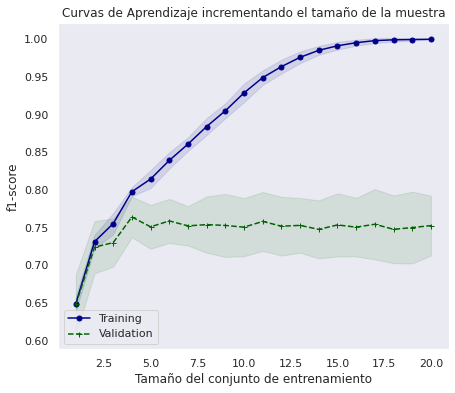

In [ ]:
print('Curvas de aprendizaje del modelo DT:')
mi_ModeloYCurvasDT(X_train)

###Curvas del modelo de Regresión de Bosque Aleatorio

  
3.  Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando el tamaño de la muestra para el modelo de regresión bosque aleatorio (random forest) con su hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de los conjuntos de entrenamiento y la métrica “recall”, como evaluación del desempeño del modelo. 

In [ ]:
#Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando el tamaño de la muestra para el modelo de regresión bosque aleatorio (random forest) con su hiperparámetros predeterminados. 
#Utilizar al menos 20 puntos en la partición de los conjuntos de entrenamiento y la métrica “recall”, como evaluación del desempeño del modelo.  
modelos, nombres = get_models()  # cargamos los modelos a comparar
resultados = list() 
def mi_ModeloYCurvasRFC(Xin):
     
       modelo = modelos[2]

       Xct = columnasTransformer.fit(Xin)
       Xxt = Xct.transform(Xin)


       mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=0)

          
       delta_train_sz = np.linspace(0.1, 1.0, num=20)

       tr_sizes, tr_scores, val_scores = learning_curve(estimator = modelo,    
                                                        X = Xxt,
                                                        y = y_train,
                                                        cv = mi_kfold,
                                                        train_sizes = delta_train_sz,
                                                        scoring = make_scorer(mi_recall) ,
                                                        random_state=0)
       
       
       mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, 'recall')

Curvas de aprendizaje del modelo RFC:


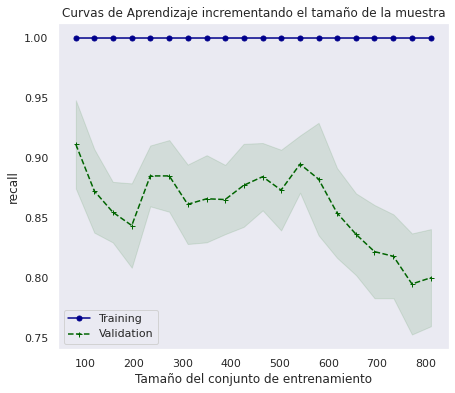

In [ ]:
print('Curvas de aprendizaje del modelo RFC:')
mi_ModeloYCurvasRFC(X_train)

#**Ejercicio-5.**

 Finalmente veamos la manera de mejorar los valores de los hiperparámetros de cada modelo, así
como el problema del sobreentrenamiento de algunos de ellos. Para ello deberás usar el método
GridSearchCV() de scikit-learn. Recuerda que este método hace una búsqueda de los mejores
hiperparámetros de un modelo mediante el llamada formato de malla y aplicando validación
cruzada. En cada caso puedes incrementar el máximo de iteraciones,”max_iter” para que tengas
la convergencia adecuada para todas las combinaciones en cada modelo. Recuerda también
aplicar las transformaciones que definiste en tu Pipeline. Para fines de este ejercicio se ha
seleccionado para cada modelo una métrica diferente, que permita irte familiarizando con ellas.
Puedes consultar su documentación de GridSearchCV en la siguiente liga:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html 


1. Para el modelo de regresión logística realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: C, solver, class_weight y penalty. En este caso deberás usar la métrica (scoring) “f1-score”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica f1. ¿Cuál es la utilidad de la métrica “f1-score”? Incluye tus conclusiones.

NOTA: Toma en cuenta que no todas las combinaciones de “solver” y “penalty” son 
posibles, para que lo tomes en cuenta al momento de realizar la búsqueda. Revisa la 
documentación. 

In [ ]:
modelo = LogisticRegression(max_iter=10000, random_state=0)

dicc_grid = [{'penalty':['l1'],
             'C':[0.0001,0.01,0.1,1.0,10.,100.],
             'solver':['saga'],
             'class_weight':['balanced', None],
                          },
            {'penalty':['l2'],
             'C':[0.0001,0.01,0.1,1.0,10.,100.],
             'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
             'class_weight':['balanced', None],
                          },
             {'penalty':['elasticnet'],
             'C':[0.0001,0.01,0.1,1.0,10.,100.],
             'solver':['saga'],
             'class_weight':['balanced', None],
             'l1_ratio': [0.5],
                          }]

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)

grid = GridSearchCV(estimator=modelo, 
                    param_grid=dicc_grid, 
                    cv=cv, 
                    scoring=make_scorer(mi_f1score))

In [ ]:
Xx = columnasTransformer.fit_transform(X_train)

grid.fit(Xx, np.ravel(y_train))

print('Mejor valor de f1-score obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

Mejor valor de f1-score obtenido con la mejor combinación: 0.809849448862499
Mejor combinación de valores encontrados de los hiperparámetros: {'C': 100.0, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Métrica utilizada: make_scorer(mi_f1score)


## ¿Cuál es la utilidad de la métrica “f1-score”? Incluye tus conclusiones.

Primero antes de llegar a F1-score tenemos que hablar de Precisión y Exhaustividad. 

La métrica de precisión podemos medir la calidad del modelo de machine learning en tareas de clasificación. 

La métrica de exhaustividad nos va a informar sobre la cantidad que el modelo de machine learning es capaz de identificar. 

Por ende, el valor F1-score se utiliza para combinar las medidas de precisión y recall en un sólo valor. El valor F1-score asume que nos importa de igual forma la precisión y la exhaustividad. Esto es práctico porque hace más fácil el poder comparar el rendimiento combinado de la precisión y la exhaustividad entre varias soluciones.

2.  Con los mejores valores de los hiperparámetros encontrados con la métrica “f1-score” para el modelo de regresión logística, obtener las curvas de aprendizaje (learning curve), incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento. 

In [ ]:
def mi_ModeloYCurvasLRBest(Xin):
     
       modelo = LogisticRegression(penalty=grid.best_params_.get('penalty'), 
                            max_iter=10000,
                            C=grid.best_params_.get('C'),
                            solver=grid.best_params_.get('solver'),
                            class_weight=grid.best_params_.get('class_weight'),
                            random_state=0)

       Xct = columnasTransformer.fit(Xin)
       Xxt = Xct.transform(Xin)
       



       mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=0)

          
       delta_train_sz = np.linspace(0.1, 1.0, num=40)

       tr_sizes, tr_scores, val_scores = learning_curve(estimator = modelo,    
                                                        X = Xxt,
                                                        y = y_train,
                                                        cv = mi_kfold,
                                                        train_sizes = delta_train_sz,
                                                        scoring = make_scorer(mi_f1score) ,
                                                        random_state=0)
       
       
       mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores,'f-score')

Curvas de aprendizaje del modelo LR Mejorado:


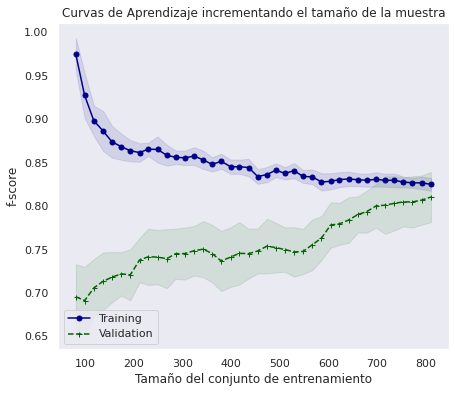

In [ ]:
print('Curvas de aprendizaje del modelo LR Mejorado:')
mi_ModeloYCurvasLRBest(X_train)

3. Para el modelo de árbol de decisión (decision tree) realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) “precision”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica “precision”. ¿Cuál es la utilidad de la métrica “precision”? Incluye tus conclusiones. 


In [ ]:
modeloDT = DecisionTreeClassifier(random_state = 0)

# dicc_gridDT = {'ccp_alpha':[.01,.02, .001,.0001,.00001],
#              'criterion':['gini','entropy','log_loss'],
#              'max_depth':[2,4,6,8,10,12],
#              'min_samples_split':[2,4,6,8,10,12],
#              'class_weight':['balanced',None],
#                           }

dicc_gridDT = {'ccp_alpha':[.01,.02, .001,.0001,.00001],
             'criterion':['gini','entropy'],
             'max_depth':[2,4,6,8,10,12],
             'min_samples_split':[2,4,6,8,10,12],
             'class_weight':['balanced',None],
                          }

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)

gridDT = GridSearchCV(estimator=modeloDT, 
                    param_grid=dicc_gridDT, 
                    cv=cv, 
                    scoring=make_scorer(mi_precision))

In [ ]:
Xx = columnasTransformer.fit_transform(X_train)

gridDT.fit(Xx, y_train)

print('Mejor valor de Precision obtenido con la mejor combinación:', gridDT.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', gridDT.best_params_)
print('Métrica utilizada:', gridDT.scoring)

Mejor valor de Precision obtenido con la mejor combinación: 0.828625063855809
Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 0.001, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 12}
Métrica utilizada: make_scorer(mi_precision)


## ¿Cuál es la utilidad de la métrica “precision”?

Con la métrica de precisión podemos medir la calidad del modelo de machine learning en tareas de clasificación.

Es decir, que, dependiendo del valor arrojado con esta métrica, los clientes a los que denotemos como crédito riesgoso, realmente lo serán. O en otras palabras nos ayuda a identificar el porcentaje de los valores positivos detectados o casos de riesgo y con ellos evitar pérdidas de dinero al banco.


4. Con los mejores valores de los hiperparámetros encontrados con la métrica “precision” para el modelo de árbol de decisión, obtener las curvas de  aprendizaje (learning curve), incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y
evitar el sobreentrenamiento o el subentrenamiento. 

In [ ]:
def mi_ModeloYCurvasDTBest(Xin):
    modelo = DecisionTreeClassifier(max_depth=gridDT.best_params_.get('max_depth'),
                                    ccp_alpha=gridDT.best_params_.get('ccp_alpha'),                               
                                    class_weight=gridDT.best_params_.get('class_weight'),                                
                                    criterion=gridDT.best_params_.get('criterion'),
                                    min_samples_split=gridDT.best_params_.get('min_samples_split'),
                                    random_state = 0)
    

    Xct = columnasTransformer.fit(Xin)
    Xxt = Xct.transform(Xin)


    mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=0)

          
    delta_train_sz = np.linspace(0.1, 1.0, num=40)

    tr_sizes, tr_scores, val_scores = learning_curve(estimator = modelo,    
                                                        X = Xxt,
                                                        y = y_train,
                                                        cv = mi_kfold,
                                                        train_sizes = delta_train_sz,
                                                        scoring = make_scorer(mi_precision) ,
                                                        random_state=0)
       
    mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores,'Precision')

Curvas de aprendizaje del modelo DT Mejorado:


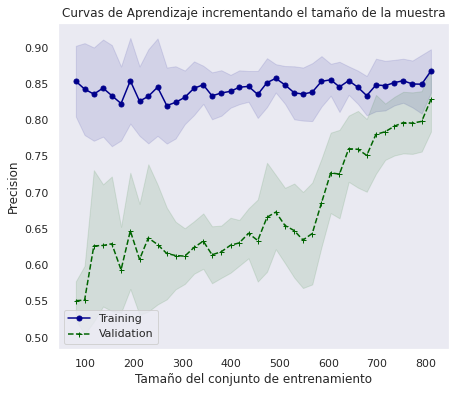

In [ ]:
print('Curvas de aprendizaje del modelo DT Mejorado:')
mi_ModeloYCurvasDTBest(X_train)

5. Para el modelo de bosque aleatorio (random forest) realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) “recall”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor
desempeño (score) obtenido con la métrica “recall”. ¿Cuál es la utilidad de la métrica “recall”? Incluye tus conclusiones. NOTA: Toma en cuenta que el método de random forest pude tardar varios minutos en
llevar a cabo 


In [ ]:
modeloRFC = RandomForestClassifier(random_state = 0)

# dicc_gridRFC = { 'ccp_alpha':[0.1, .01, .001,.0001],
#              'criterion':['gini','entropy'],
#              'max_depth':[2,4,6,8,10,12],
#              'min_samples_split':[2,4,6,8,10,12],
#              'class_weight':['balanced',None],
#                           } 
#Este metodo tomo 45 minutos, dejaremos abajo ya con los valores escogidos para evitar ese tiempo
dicc_gridRFC = {'ccp_alpha':[.001],
                'criterion':['gini'],
                'max_depth':[12],
                'min_samples_split':[2],
                'class_weight':['balanced'],
                          }

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)

gridRFC = GridSearchCV(estimator=modeloRFC, 
                    param_grid=dicc_gridRFC, 
                    cv=cv, 
                    scoring=make_scorer(mi_recall))

In [ ]:
Xx = columnasTransformer.fit_transform(X_train)

gridRFC.fit(Xx, y_train)

print('Mejor valor de Recall obtenido con la mejor combinación:', gridRFC.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', gridRFC.best_params_)
print('Métrica utilizada:', gridRFC.scoring)

Mejor valor de Recall obtenido con la mejor combinación: 0.7856597424448329
Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 0.001, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 12, 'min_samples_split': 2}
Métrica utilizada: make_scorer(mi_recall)


6. Con los mejores valores de los hiperparámetros encontrados con la métrica “recall” para el modelo de bosque aleatorio, obtener las curvas de validación (validation curve), incrementando la complejidad del modelo a través del hiperparámetro “max_depth” con
al menos 10 valores. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento. 


In [ ]:
def mi_ModeloYCurvasRFCBest(Xin):
  
     modelo = RandomForestClassifier(ccp_alpha=gridRFC.best_params_.get('ccp_alpha'),                               
                                    class_weight=gridRFC.best_params_.get('class_weight'),                                
                                    criterion=gridRFC.best_params_.get('criterion'),
                                    min_samples_split=gridRFC.best_params_.get('min_samples_split'),
                                    random_state = 0)

     Xct = columnasTransformer.fit(Xin)
     Xxt = Xct.transform(Xin)


     mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=0)

     
     param_range = np.linspace(1,20,10, dtype='int')
     t_scores, v_scores = validation_curve(estimator = modelo,    
                                                        X = Xxt,
                                                        y = y_train,
                                                        param_name = "max_depth",
                                                        param_range = param_range,
                                                        cv = mi_kfold,
                                                        scoring = make_scorer(mi_recall))
       
     
     mi_ValidationCurvePlot(param_range, t_scores, v_scores, 'recall')     
  

Curvas de aprendizaje del modelo RFC Mejorado:


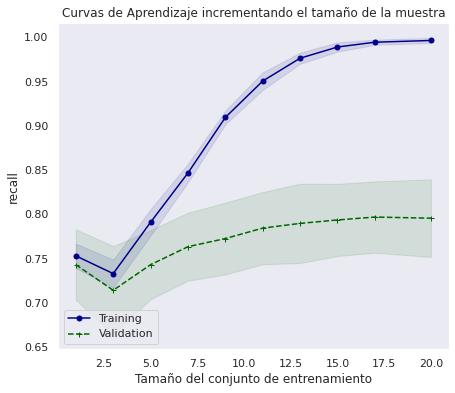

In [ ]:
print('Curvas de aprendizaje del modelo RFC Mejorado:')
mi_ModeloYCurvasRFCBest(X_train)

## ¿Cuál es la utilidad de la métrica “recall”?

La métrica de exhaustividad nos va a informar sobre la cantidad que el modelo de machine learning es capaz de identificar. Es decir, el modelo sólo es capaz de identificar, dependiendo del resultado que, del mismo, serán los clientes representan un crédito riesgoso. O en otras palabras el porcentaje de Recall nos ayudara a identificar los clientes que representan un alto riesgo para el banco y por ende perdidas de dinero a futuro.

### **NOTA.**

La función log_loss nos dio problemas de convergencia en los datos, al regresar valores de NaN, por ende el equipo decidió removerla del análisis de GridSearchCV() para poder continuar con los ejercicios, ya que todo parece indicar que para poder utilizarla debemos hacer un tratamiento a los datos de manera distinta.

#**Ejercicio-6.**

Para cada uno de estos tres modelos, con las métricas que se consideraron en cada caso y usando el conjunto de Prueba que no has utilizado hasta hora, obtener los modelos finales como se te indica a continuación. Deberás usar además como conjunto de entrenamiento el llamado modelo de entrenamiento “aumentado” que consiste en las datos que estuviste utilizando para entrenamiento y validación

1. Obtener el modelo de regresión logística con los mejores parámetros que hayas
encontrado con la métrica f1-score utilizada. Imprimir el valor de dicha métrica e incluye
tus conclusiones finales para este caso. Incluir un gráfico del árbol de decisión final
obtenido. 


In [ ]:
modeloLR_Final = LogisticRegression(penalty=grid.best_params_.get('penalty'), 
                            max_iter=10000,
                            C=grid.best_params_.get('C'),
                            solver=grid.best_params_.get('solver'),
                            class_weight=grid.best_params_.get('class_weight'),
                            random_state=0)

# Entrenamos el modelo por última vez con los datos de entrenamiento y validación conjuntos:
Xct = columnasTransformer.fit(X_train)
Xxt = Xct.transform(X_train)
modeloLR_Final.fit(Xxt, np.ravel(y_train))

# Transformamos los datos de prueba y los utilizamos por primera vez para obtener sus predicciones
# y desempeño del modelo:

Xxtest = Xct.transform(X_val)
print('Mejor valor de f1-score obtenido con la mejor combinación:', grid.best_score_)
print("Mejor valor del modelo de Regresion Logistica:", modeloLR_Final.score(Xxtest, np.ravel(y_val)))

Mejor valor de f1-score obtenido con la mejor combinación: 0.809849448862499
Mejor valor del modelo de Regresion Logistica: 0.68


##Conclusiones.

Al ver los resultados del modelo, podemos denotar que el modelo de cierta forma tiene un buen resultado de equilibrio entre precisión y Recall, al ver un valor de F1-score del 0.81 (redondeado), esto nos dice ya que al ser una media armónica, tenemos equilibrio entre los datos, por ende tenderíamos a tener una buena predicción entre los créditos riesgosos que si lo son y entre todo crédito que sea riesgoso sin importar si el modelo lo detecta o no.

2. Obtener el modelo de árbol de decisiones con los mejores parámetros que hayas encontrado con la métrica “precision” utilizada. Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso. 


In [ ]:
modeloDT_Final = DecisionTreeClassifier(max_depth=gridDT.best_params_.get('max_depth'),
                                    ccp_alpha=gridDT.best_params_.get('ccp_alpha'),                               
                                    class_weight=gridDT.best_params_.get('class_weight'),                                
                                    criterion=gridDT.best_params_.get('criterion'),
                                    min_samples_split=gridDT.best_params_.get('min_samples_split'),
                                    random_state = 0)


Xct = columnasTransformer.fit(X_train)
Xxt = Xct.transform(X_train)
modeloDT_Final.fit(Xxt, y_train)

Xxtest = Xct.transform(X_val)
print('Mejor valor de Precision obtenido con la mejor combinación:', gridDT.best_score_)
print("Mejor valor del modelo del Arbol de Decision:", modeloDT_Final.score(Xxtest, np.ravel(y_val)))

Mejor valor de Precision obtenido con la mejor combinación: 0.828625063855809
Mejor valor del modelo del Arbol de Decision: 0.6333333333333333


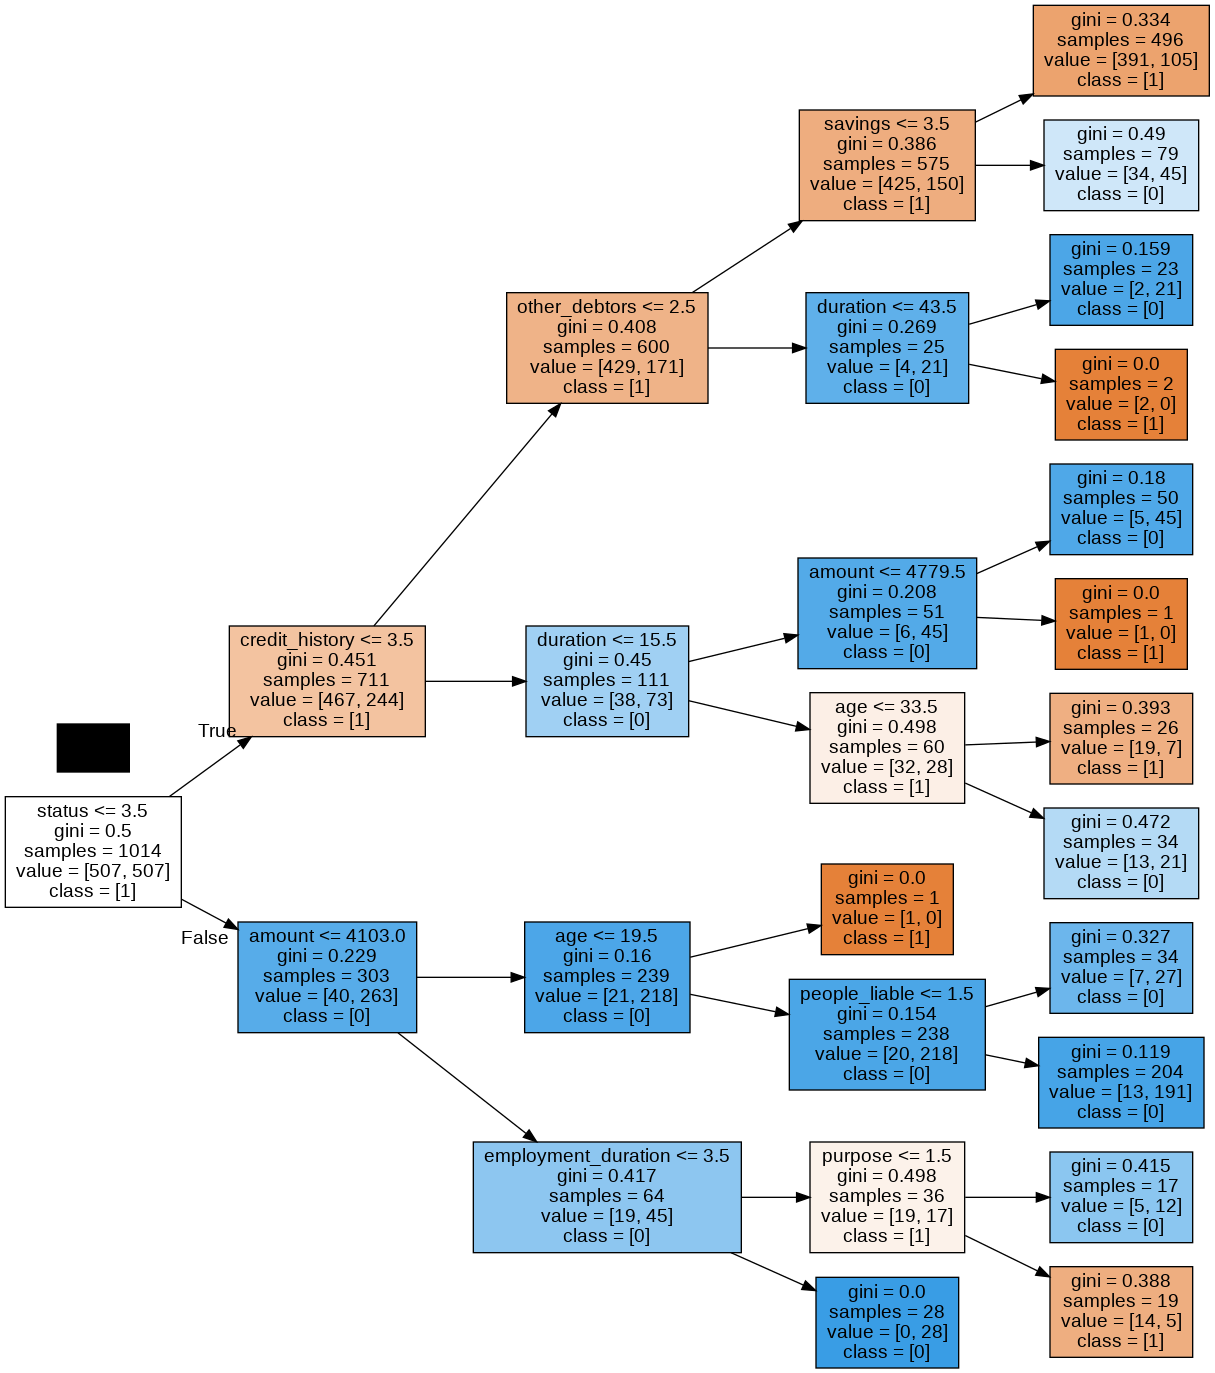

In [ ]:
modeloDT_Final = DecisionTreeClassifier(max_depth=gridDT.best_params_.get('max_depth'),
                                    ccp_alpha=gridDT.best_params_.get('ccp_alpha'),                               
                                    class_weight=gridDT.best_params_.get('class_weight'),                                
                                    criterion=gridDT.best_params_.get('criterion'),
                                    min_samples_split=gridDT.best_params_.get('min_samples_split'),
                                    random_state = 0,
                                    max_features = 20,
                                    max_leaf_nodes = 20)
modeloDT_Final.fit(X_train, y_train)
dot_data = tree.export_graphviz(decision_tree=modeloDT_Final, 
                                out_file=None,
                                max_depth=gridDT.best_params_.get('max_depth'),
                                feature_names=list(pd.DataFrame(X_train).columns.values),
                                class_names=[str(np.unique(y_train[0])),str(np.unique(y_train[1]))],
                                filled=True,
                                rotate=True,
                                proportion=False)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

##Conclusiones.
Al tener un valor de precisión igual a 0.82, nos dice que nuestro modelo está siendo preciso al grado de determinar en gran totalidad cuando un crédito si es riesgoso o en otras palabras esta discriminando todo esos créditos que no son riesgosos y los catalogara como que si lo son. Por ende, la precisión sale igual al 82%.

3. Obtener el modelo de bosque aleatorio con los mejores parámetros que hayas encontrado con la métrica “recall” utilizada. Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso. 

In [ ]:
modeloRFC_Final = RandomForestClassifier(max_depth=gridRFC.best_params_.get('max_depth'),
                                         ccp_alpha=gridRFC.best_params_.get('ccp_alpha'),                               
                                         class_weight=gridRFC.best_params_.get('class_weight'),                                
                                         criterion=gridRFC.best_params_.get('criterion'),
                                         min_samples_split=gridRFC.best_params_.get('min_samples_split'),
                                         random_state = 0)


Xct = columnasTransformer.fit(X_train)
Xxt = Xct.transform(X_train)
modeloRFC_Final.fit(Xxt, np.ravel(y_train))

Xxtest = Xct.transform(X_val)
print('Mejor valor de Recall obtenido con la mejor combinación:', gridRFC.best_score_)
print("Mejor valor del modelo del Bosque Aleatorio:", modeloRFC_Final.score(Xxtest, np.ravel(y_val)))

Mejor valor de Recall obtenido con la mejor combinación: 0.7889406587717596
Mejor valor del modelo del Bosque Aleatorio: 0.7266666666666667


##Conclusiones.
Al tener un valor de Recall igual a 0.79, nos dice que nuestro modelo está siendo preciso al grado de determinar en en gran medida cuando un crédito si es riesgoso, en otras palabras esta tomando en cuenta todo esos créditos que son riesgosos y los catalogara como que no lo son. Por ende, Recall nos da un indicio bastante bueno, que a pesar de no tener los resultados del modelo de árbol de decisiones, es bastante efectivo detectando todos aquellos creditos que son riesgosos para el banco.

Referencias.

1. Heras, J. M. (09 de 10 de 2020). Precision, Recall, F1, Accuracy en clasificación. Obtenido de https://www.iartificial.net/precision-recall-f1-accuracy-en-clasificacion/

2. Anzai, Y. (2012). Pattern Recognition and Machine Learning. Morgan Kaufmann. 

3. Morales, L. E. (2022). Árbol de Decisiones. Guadalajara, Jalisco.

4. T. M. Alam et al., "An Investigation of Credit Card Default Prediction in the Imbalanced Datasets," in IEEE Access, vol. 8, pp. 201173-201198, 2020, doi: 10.1109/ACCESS.2020.3033784.

5. Abad, J. G. (Mayo de 2021). Comparativa de técnicas de balanceo de datos. Aplicación a un caso real para la predicción de fuga de clientes. Obtenido de chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://digibuo.uniovi.es/dspace/bitstream/handle/10651/60629/TFM_Joaqu%C3%ADnGarc%C3%ADaAbad.pdf?sequence=4

6. Morales, L. E. (2022). Clases no balanceadas y técnicas de Submuestreo y Sobremuestreo. Guadalajara, Mexico.



###**Fin de la Actividad de la semana 6.**